In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
from openTSNE import TSNE
from tqdm.notebook import tqdm

In [2]:
project_dir = "C:\\Users\\tilenkopac\\Projects\\genome-embedding"
dataset_dir = os.path.join(project_dir, "data", "deepmicrobes_mag_reads")
# project_dir = "/d/hpc/home/tcurk/tkopac/genome-embedding"
# dataset_dir = os.path.join(project_dir, "data", "deepmicrobes_mag_reads")

In [3]:
n_embeddings = 0
with open(os.path.join(dataset_dir, "embeddings", "661k_conv_small_elu_loc_pres_ld10_ws100_take_2", "no-sampler", "val.csv"), "rt") as file:
    for _ in tqdm(file, desc="Counting embeddings"):
        n_embeddings += 1

Counting embeddings: 0it [00:00, ?it/s]

Reading embeddings
Drawing t-SNE transformation
--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 2.6172, 50 iterations in 0.0360 sec
Iteration  100, KL divergence 2.6166, 50 iterations in 0.0370 sec
Iteration  150, KL divergence 2.6160, 50 iterations in 0.0380 sec
Iteration  200, KL divergence 2.6164, 50 iterations in 0.0380 sec
Iteration  250, KL divergence 2.6163, 50 iterations in 0.0370 sec
   --> Time elapsed: 0.19 seconds
===> Running optimization with ex

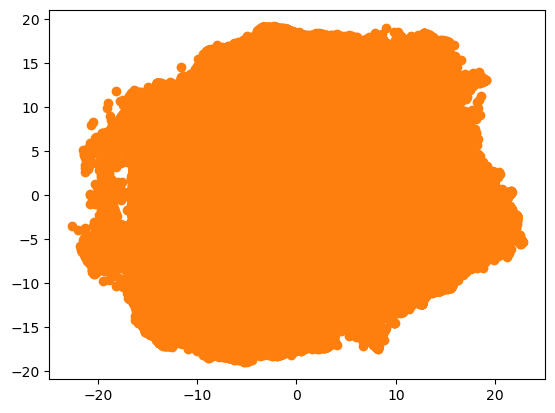

In [10]:
def analyse_autoencoder_embeddings(autoencoder_name, sampler_name, draw_latent_dist=True, draw_tsne=True):

    # read embeddings
    with open(os.path.join(dataset_dir, "embeddings", autoencoder_name, sampler_name, f"val.csv"), "rt") as file:
        print("Reading embeddings")
        embeddings = [json.loads(line.strip().split(";")[1]) for line in file.readlines()]

    embeddings_np = np.array(embeddings)

    if draw_latent_dist:
        # draw latent value distributions
        print("Drawing latent value distributions")
        n_cols = 5
        fig, axes = plt.subplots(int(np.ceil(embeddings_np.shape[1] / n_cols)), n_cols, figsize=(12, 6))
        fig.suptitle(autoencoder_name, fontsize=14)
        for i in range(embeddings_np.shape[1]):
            row = np.where(np.arange(0, embeddings_np.shape[1], n_cols) <= i)[0][-1]
            column = i % n_cols
            axes[row][column].hist(embeddings_np[:, i], bins=20)

    if draw_tsne:
        # calculate and draw t-sne
        print("Drawing t-SNE transformation")
        tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
        # todo: Povečaj učno množico? Z 10 % vseh vložitev traja proces okoli 10 min
        tsne_embedding_train = tsne.fit(embeddings_np[:int(0.0001 * embeddings_np.shape[0])])
        tsne_embedding_test = tsne_embedding_train.transform(embeddings_np[int(0.8 * embeddings_np.shape[0]):])

        fig, ax = plt.subplots()
        ax.scatter(tsne_embedding_test[:, 0], tsne_embedding_test[:, 1])

    return embeddings

analyse_autoencoder_embeddings("661k_conv_small_elu_loc_pres_ld10_ws100_take_2", "no-sampler", draw_latent_dist=False);

Reading embeddings of "661k_conv_small_loc_pres_ld10_ws100" + "no-sampler":   0%|          | 0/5100000 [00:00<…

10 most common latent vectors:
	• [0.67, 0.6, 0.37, 0.38, 0.47, 0.88, 0.78, 0.36, 0.57, 0.73]: 6 (0.0001 %)
	• [0.35, 0.53, 0.68, 0.57, 0.51, 0.96, 0.79, 0.11, 0.64, 0.4]: 6 (0.0001 %)
	• [0.62, 0.48, 0.43, 0.46, 0.51, 0.92, 0.74, 0.64, 0.6, 0.22]: 6 (0.0001 %)
	• [0.36, 0.31, 0.69, 0.38, 0.47, 1.05, 0.91, 0.32, 0.44, 0.55]: 5 (0.0001 %)
	• [0.65, 0.38, 0.91, 0.34, 0.42, 0.98, 0.58, 0.45, 0.45, 0.19]: 5 (0.0001 %)
	• [0.8, 0.71, 0.5, 0.29, 0.68, 0.87, 0.59, 0.38, 0.45, 0.4]: 5 (0.0001 %)
	• [0.45, 0.35, 0.69, 0.37, 0.48, 0.82, 0.87, 0.43, 0.42, 0.74]: 5 (0.0001 %)
	• [0.5, 0.4, 0.62, 0.65, 0.29, 0.81, 0.73, 0.48, 0.6, 0.69]: 5 (0.0001 %)
	• [0.3, 0.69, 0.68, 0.54, 0.53, 1.0, 0.64, 0.2, 0.61, 0.59]: 5 (0.0001 %)
	• [0.61, 0.46, 0.69, 0.3, 0.64, 0.88, 0.66, 0.2, 0.72, 0.37]: 5 (0.0001 %)


Reading embeddings of "661k_conv_small_elu_loc_pres_ld10_ws100_take_2" + "no-sampler":   0%|          | 0/5100…

10 most common latent vectors:
	• [0.36, 0.01, 0.15, 0.29, 0.3, 0.36, 0.4, 0.32, 0.24, 0.45]: 7 (0.0001 %)
	• [0.29, 0.25, 0.42, 0.23, 0.19, 0.23, 0.39, 0.48, 0.3, 0.04]: 6 (0.0001 %)
	• [0.33, 0.16, 0.49, 0.36, 0.25, 0.34, 0.12, 0.39, 0.3, 0.34]: 6 (0.0001 %)
	• [0.37, 0.15, 0.31, 0.29, 0.16, 0.44, 0.23, 0.46, 0.29, 0.17]: 6 (0.0001 %)
	• [0.42, 0.3, 0.32, 0.04, 0.26, 0.57, 0.21, 0.2, 0.13, 0.21]: 6 (0.0001 %)
	• [0.36, 0.46, 0.28, 0.28, 0.15, 0.16, 0.41, 0.16, 0.04, 0.3]: 6 (0.0001 %)
	• [0.51, 0.34, 0.41, 0.26, 0.35, 0.08, 0.35, 0.38, 0.33, 0.38]: 5 (0.0001 %)
	• [0.32, 0.34, 0.31, 0.29, 0.37, 0.18, 0.23, 0.43, 0.27, 0.26]: 5 (0.0001 %)
	• [0.32, 0.5, 0.31, 0.33, 0.27, 0.39, 0.27, 0.22, 0.25, 0.19]: 5 (0.0001 %)
	• [0.18, 0.32, 0.4, 0.14, 0.17, 0.5, 0.13, 0.32, 0.25, 0.38]: 5 (0.0001 %)


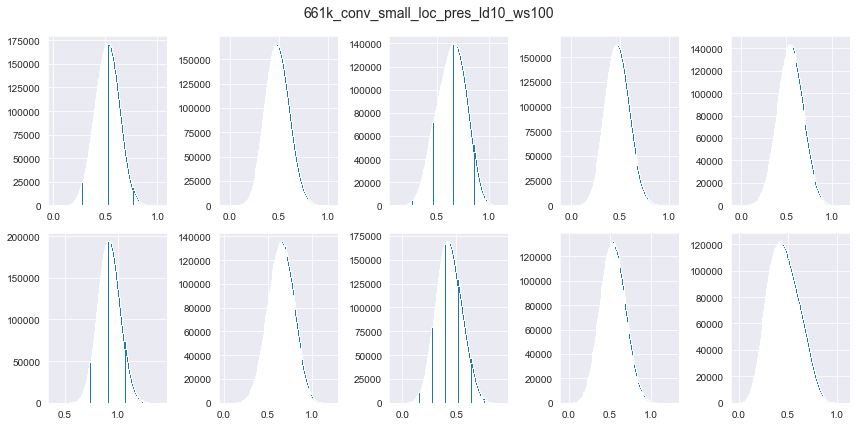

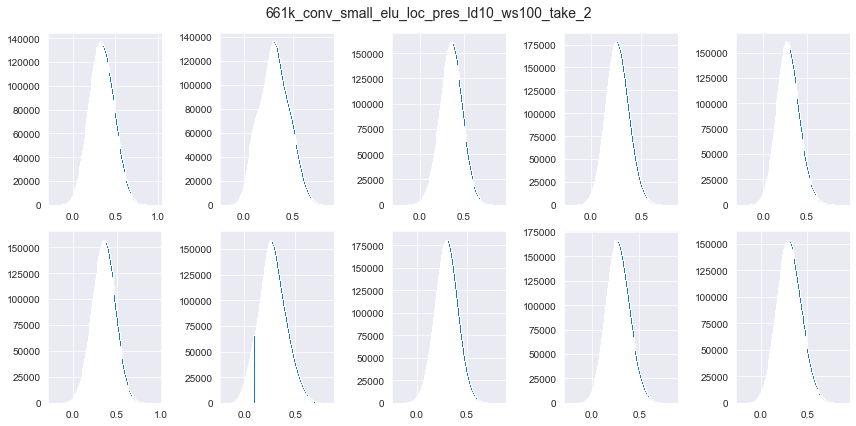

In [7]:
# autoencoder_names = [
#     "PARAMETER_TESTING_661k_conv_small_relu",
#     "PARAMETER_TESTING_661k_conv_small_relu_rec_only",
#     "PARAMETER_TESTING_661k_conv_small_elu",
#     "PARAMETER_TESTING_661k_conv_small_elu_rec_only",
#     "PARAMETER_TESTING_661k_conv_small_elu_argmax_activation",
#     "PARAMETER_TESTING_661k_conv_small_elu_rec_only_argmax_activation"
# ]
autoencoder_names = [
    "661k_conv_small_loc_pres_ld10_ws100",
    "661k_conv_small_elu_loc_pres_ld10_ws100_take_2"
]
for name in autoencoder_names:
    analyse_autoencoder_embeddings(name, "no-sampler")

In [ ]:
# todo: preslikaj vložitve v nižje dimenzionalni prostor (s t-SNE) in poglej, če se razredi med seboj vizualno ločijo - če ne, ima klasifikator zaradi tega verjetno težave – pošlji Tomažu, ko bo
# todo: če bo t-SNE dober, lahko poskusimo še rec only autoencoder